<h1 style="color:green" align="center"> Capstone project </h1>

<h2 style="color:green" align="center"> Microsoft Professional Programme in Data Science  </h2>

<h2 style="color:green" align="left"> Title: Mortgage Approvals Prediction From Government Data</h2>
 

<h2 style="color:green" align="left"> Author: Ezekiel Adebayo Ogundepo</h2>
<h2 style="color:green" align="left"> Date: June, 2019 </h2>

This Capstone project is the challenge set by Microsoft after completed 10+ require modules for the Microsoft Professional Programme (MPP) in Datascience.

The project considers how demographics, location, property type, lender, and other factors are related to whether a mortgage application was accepted or denied. We shall use the knowledge gained in the programme to build a model for predicting mortgage loan approval across the United States. The dataset can be found [here](https://datasciencecapstone.org/competitions/14/mortgage-approvals-from-government-data/data/).

# Classification learning problem
Classification predictive modeling is the task of approximating a mapping function ($f$) from the vector
of features ($X$) to discrete label ($Y$). The mapping function ($f$) predicts the class for a given instance
or observation. When two classes are involved in the label ($Y$), it is called binary classification problem,
while a multi-class problem involved more than two classes. Since our target only has two classes, then we have a binary classification problem.

# Import Python packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import datasets

In [2]:
# Import train_values data
train_values = pd.read_csv('Data/train_values.csv')

In [3]:
train_values.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant
0,0,3,1,1,1,70.0,3,18,37,246,...,1,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,False
1,1,1,1,3,1,178.0,3,369,52,299,...,1,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,False
2,2,2,1,3,1,163.0,3,16,10,306,...,1,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,False
3,3,1,1,1,1,155.0,1,305,47,180,...,1,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,True
4,4,1,1,1,1,305.0,3,24,37,20,...,2,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,False


In [4]:
# Import train_labels data
train_labels = pd.read_csv('Data/train_labels.csv')

In [5]:
train_labels.head()

,row_id,accepted
0,0,1
1,1,0
2,2,1
3,3,1
4,4,1


In [6]:
# Join the train_values (features) and train_labels (target)
df = pd.merge(train_values, train_labels, how = 'inner', on = 'row_id')

Description of the dataset and its features can be found [here](https://datasciencecapstone.org/competitions/14/mortgage-approvals-from-government-data/page/44/).

In [7]:
df.set_index('row_id', inplace = True)
df.head()

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,...,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted
row_id,,,,,,,,,,,,,,,,,,,,,
0,3,1,1,1,70.0,3,18,37,246,2,...,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,False,1
1,1,1,3,1,178.0,3,369,52,299,1,...,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,False,0
2,2,1,3,1,163.0,3,16,10,306,2,...,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,False,1
3,1,1,1,1,155.0,1,305,47,180,2,...,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,True,1
4,1,1,1,1,305.0,3,24,37,20,2,...,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,False,1


In [8]:
df.shape

(500000, 22)

The dataset has 21 features and target variable **accepted** which indicated whether each of the $500,000$ mortgage loan applications is accepted or declined.

### Check for class balance

In [9]:
df.accepted.value_counts(normalize = True)*100

1    50.0228
0    49.9772
Name: accepted, dtype: float64

It can be seen that the data have equal classes for the label.

In [10]:
# variable names
df.columns

Index(['loan_type', 'property_type', 'loan_purpose', 'occupancy',
       'loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code',
       'applicant_ethnicity', 'applicant_race', 'applicant_sex',
       'applicant_income', 'population', 'minority_population_pct',
       'ffiecmedian_family_income', 'tract_to_msa_md_income_pct',
       'number_of_owner-occupied_units', 'number_of_1_to_4_family_units',
       'lender', 'co_applicant', 'accepted'],
      dtype='object')

In [11]:
# Examine the data
df.dtypes

loan_type                           int64
property_type                       int64
loan_purpose                        int64
occupancy                           int64
loan_amount                       float64
preapproval                         int64
msa_md                              int64
state_code                          int64
county_code                         int64
applicant_ethnicity                 int64
applicant_race                      int64
applicant_sex                       int64
applicant_income                  float64
population                        float64
minority_population_pct           float64
ffiecmedian_family_income         float64
tract_to_msa_md_income_pct        float64
number_of_owner-occupied_units    float64
number_of_1_to_4_family_units     float64
lender                              int64
co_applicant                         bool
accepted                            int64
dtype: object

From the description of the dataset, it can be seen that some of the variables are not in their right data types for example `loan_type` is a categorical data and pandas reads it as an **integer**. The cell below convert them to the right data types.

In [12]:
convert_dict = {'loan_type': 'object', 'property_type':'object', 'loan_purpose': 'object', 'occupancy': 'object',
        'preapproval': 'object', 'msa_md': 'object', 'state_code': 'object', 'county_code': 'object',
       'applicant_ethnicity': 'object', 'applicant_race': 'object', 'applicant_sex': 'object',
       'lender': 'object', 'co_applicant': 'bool'}

df = df.astype(convert_dict)
df.dtypes

loan_type                          object
property_type                      object
loan_purpose                       object
occupancy                          object
loan_amount                       float64
preapproval                        object
msa_md                             object
state_code                         object
county_code                        object
applicant_ethnicity                object
applicant_race                     object
applicant_sex                      object
applicant_income                  float64
population                        float64
minority_population_pct           float64
ffiecmedian_family_income         float64
tract_to_msa_md_income_pct        float64
number_of_owner-occupied_units    float64
number_of_1_to_4_family_units     float64
lender                             object
co_applicant                         bool
accepted                            int64
dtype: object

# Data Exploration

### Exploratory Data Analysis of loan amount

In [13]:
df.loan_amount.describe() # In thousands of dollars

count    500000.000000
mean        221.753158
std         590.641648
min           1.000000
25%          93.000000
50%         162.000000
75%         266.000000
max      100878.000000
Name: loan_amount, dtype: float64

Applicants loan amount ranges from $\$1,000$ to $\$100,878,000$ while the mean and standard deviation are $\$221,750$ and $\$590,640$ respectively. It can be seen that the distribution of loan amount is highly skewed to the left. That is, most of the applicants have loan amount that are less than or equal to $\$1,000,000$.  We can visualize the distribution with histogram by plotting only loan amount that is less than or equal to $\$1,000,000$

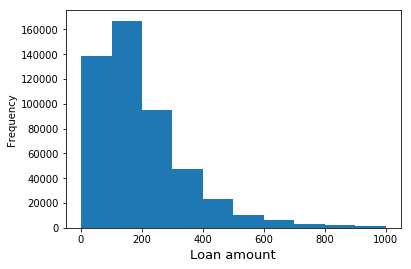

In [14]:
df.loc[df.loan_amount <= 1000, 'loan_amount'].plot(kind = 'hist')
plt.xlabel('Loan amount', fontsize = 13);
# If you don't want to see Matplotlib text above your plots, just add a semicolon at the end of your plot command.

We correct for its skewness by taking the logarithm of the values. The distribution of the log mortgage loan amount is:

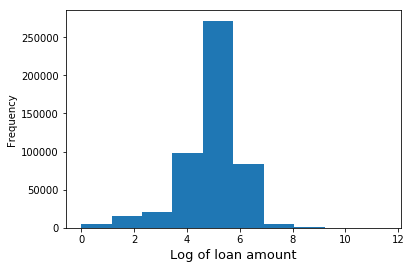

In [15]:
from numpy import log
df.loc[:, 'loan_amount'].apply(log).plot(kind = 'hist')
plt.xlabel('Log of loan amount', fontsize = 13);

### Exploratory Data Analysis on applicant income

In [16]:
df.applicant_income.describe() # In thousands of dollars

count    460052.000000
mean        102.389521
std         153.534496
min           1.000000
25%          47.000000
50%          74.000000
75%         117.000000
max       10139.000000
Name: applicant_income, dtype: float64

Applicants income range from $\$1,000$ to $\$10,139,000$ and since its distribution is skewed, we took the log of its values to correct for skewness as shown here:

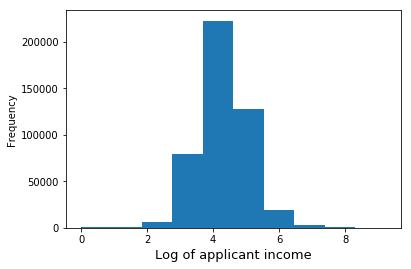

In [17]:
df.loc[:, 'applicant_income'].apply(log).plot(kind = 'hist')
plt.xlabel('Log of applicant income', fontsize = 13);

### Exploratory Data Analysis of applicant enthnicity and mortgage loan approval

In [18]:
df.groupby('applicant_ethnicity')['accepted'].mean()

applicant_ethnicity
1    0.427413
2    0.520519
3    0.398740
4    0.789311
Name: accepted, dtype: float64

It can be seen in the mortgage loan applications that applicant_ethnicity = 4 has a higher loan acceptance rate on average than applicant_ethnicity = 1.

### Exploratory Data Analysis of applicant sex and mortgage loan approval

In [19]:
df.groupby('applicant_sex')['accepted'].agg(['count', 'mean'])

,count,mean
applicant_sex,,
1,315806,0.520823
2,142876,0.466453
3,35643,0.406054
4,5675,0.795947


Also, mortgage loan application where applicant_sex = 1 has a higher loan acceptance rate on average than applicant_sex = 2.

### Correlation analysis between applicant income and loan amount

In [20]:
df.loc[df.state_code == 45, ['applicant_income', 'loan_amount']].dropna(how = 'any').corr(method = 'pearson')

,applicant_income,loan_amount
applicant_income,1.000000,0.629981
loan_amount,0.629981,1.000000


There is a strong positive relationship between applicant income and loan amount. The higher the applicant income, the higher the mortgage loan requested, on average.

### Mortgage loan acceptance rate across state code 48 and its county codes.

In [21]:
df.loc[df.state_code == 48, ['county_code', 'accepted']].loc[df.county_code != -1, :].groupby('county_code').accepted.mean()


county_code
2      0.455882
3      0.513158
10     0.643836
11     0.390244
14     0.450000
20     0.583333
31     0.583653
35     0.592814
41     0.555556
45     0.410769
47     0.473118
49     0.352941
55     0.538462
56     0.566802
57     0.363636
59     0.491124
61     0.550432
68     0.428571
72     0.315068
79     0.359606
83     0.475369
98     0.592593
100    0.463519
103    0.666667
104    0.443038
111    0.500000
122    0.509804
123    0.462329
124    0.601770
129    0.443114
         ...   
133    0.610619
134    0.363636
136    0.453125
137    0.567164
151    0.439394
156    0.478261
158    0.504630
163    0.476190
165    0.533898
180    0.518750
203    0.426471
210    0.547619
232    0.441221
233    0.510204
246    0.373219
248    0.500000
251    0.537445
257    0.564516
260    0.319149
274    0.511682
275    0.393443
288    0.514286
296    0.384615
299    0.369231
306    0.445898
311    0.598291
313    0.452055
318    0.451613
320    0.444444
321    0.574163
Name: accept

In state 48, the average rate of loan acceptance across counties varies substantially, ranging from around 30% to arround 70%.

### Mortgage loan acceptance rate across loan type and state code (2 or 4).

In [22]:
df.loc[df.state_code.isin([2,4]), ['loan_type', 'state_code', 'accepted']].groupby(['loan_type', 'state_code']).accepted.mean()*100

loan_type  state_code
1          2             43.580393
           4             56.999162
2          2             50.370763
           4             55.417790
3          2             53.180153
           4             63.945578
4          2             46.124031
           4             61.764706
Name: accepted, dtype: float64

For each of the four loan types, the loan acceptance rate in state 2 is lower than for the corresponding loan type in state 4.



<h2 style="color:purple">EDA on property location</h2>

Property location features have the following characteristics:
- msa md
- state code
- county code

in which $-1$ represented a missing value. A contingency table of the relationship between mortgage loan approval and property location feature is shown below:

In [23]:
pd.crosstab(df.accepted, df.msa_md)

msa_md,-1,0,1,2,3,4,5,6,7,8,...,399,400,401,402,403,404,405,406,407,408
accepted,,,,,,,,,,,,,,,,,,,,,
0,50889,151,762,168,114,58,71,895,99,53,...,93,98,99,112,309,96,43,62,117,192
1,26093,202,700,254,74,95,153,1240,74,95,...,98,139,258,45,446,97,77,48,70,188


There are 402 different Metropolitan Statistical Area/Metropolitan Division and each of them have different rate of mortgage loan approval.

In [24]:
pd.crosstab(df.accepted, df.state_code)

state_code,-1,0,1,2,3,4,5,6,7,8,...,42,43,44,45,46,47,48,49,50,52
accepted,,,,,,,,,,,,,,,,,,,,,
0,18590,2679,1876,17662,5858,5460,4286,19754,383,1100,...,1686,1243,2335,2294,3518,7863,8096,797,1597,2884
1,542,2551,2840,14847,5790,7398,3328,18958,633,989,...,1217,966,3651,2344,2988,9584,7665,823,994,3937


There are 52 different state codes and each of them have different rate of mortgage loan approval.

In [25]:
pd.crosstab( df.accepted, df.county_code)

county_code,-1,1,2,3,4,5,6,7,8,9,...,315,316,317,318,319,320,321,322,323,324
accepted,,,,,,,,,,,,,,,,,,,,,
0,19752,137,1177,3440,2,97,397,1921,9,22,...,233,21,55,2943,6,1263,3001,435,5,11
1,714,143,1326,4125,1,82,458,1939,12,13,...,241,19,52,2860,2,1363,3419,435,10,1


There are 324 different county codes and each of them have different rate of mortgage loan approval.

<h2 style="color:purple">EDA of other categorical features</h2>



In [26]:
# Cross tabulation of loan accepted and lender
pd.crosstab(df.accepted, df.lender)

lender,0,1,2,4,5,6,7,8,9,10,...,6498,6499,6500,6501,6503,6504,6505,6506,6507,6508
accepted,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,1,2,2,0,0,9,18,...,21,16,0,0,31,25,0,1,1,1
1,1,1,1,1,1,1,7,14,8,6,...,51,3,1,5,55,53,1,2,4,1


There are 6509 lenders that are authorized in approving or denying mortgage loan applications.

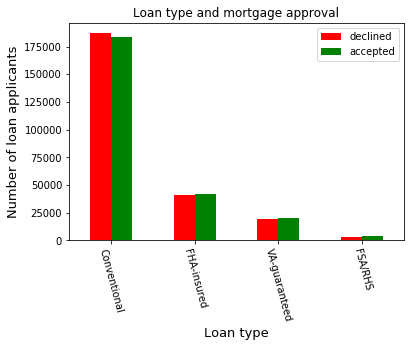

In [27]:
# visualization of loan accepted and loan type
pd.crosstab(df.loan_type, df.accepted).plot(kind = 'bar', color = ['red', 'green'], title = 'Loan type and mortgage approval')
plt.xlabel('Loan type', fontsize = 13)
plt.ylabel('Number of loan applicants', fontsize = 13)
plt.xticks([0, 1, 2, 3], ['Conventional', 'FHA-insured', 'VA-guaranteed', 'FSA/RHS' ], rotation = -75)
plt.legend(['declined', 'accepted']);

Loan type indicates whether the loan granted, applied for, or purchased was conventional, government-guaranteed, or government-insured. Conventional loan type is alway common in the mortgage loan application. From the above chart analysis there seem no impact of loan type on approval of morgage loan applications.


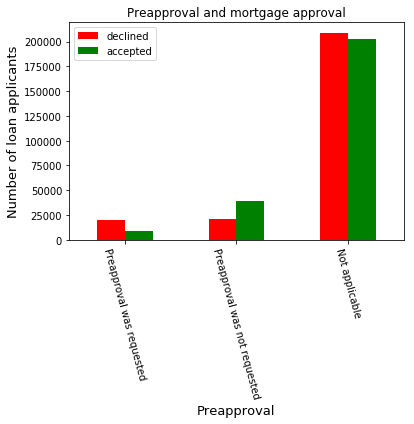

In [28]:
# visualization of loan accepted and preapproval
pd.crosstab(df.preapproval, df.accepted).plot(kind = 'bar', color = ['red', 'green'], title = 'Preapproval and mortgage approval')
plt.xlabel('Preapproval', fontsize = 13)
plt.ylabel('Number of loan applicants', fontsize = 13)
plt.xticks([0, 1, 2], ['Preapproval was requested', 'Preapproval was not requested', 'Not applicable'], rotation = -75)
plt.legend(['declined', 'accepted']);


Preapproval indicate whether the application or loan involved a request for a pre-approval of a home purchase loan. It can be seen from the chart that there are fewer cases of  preapproval 1 and 2 for mortgage loan application and that may make the feature not to be importance in the model prediction.

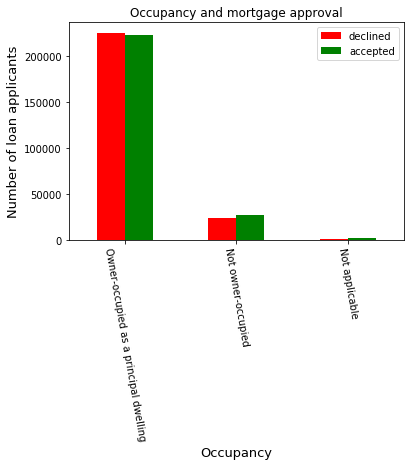

In [29]:
# visualization of loan accepted and occupancy
pd.crosstab(df.occupancy, df.accepted).plot(kind = 'bar', color = ['red', 'green'], title = 'Occupancy and mortgage approval')
plt.ylabel('Number of loan applicants', fontsize = 13)
plt.xlabel('Occupancy', fontsize = 13)
plt.xticks([0, 1, 2], ['Owner-occupied as a principal dwelling', 'Not owner-occupied', 'Not applicable'], rotation = -80)
plt.legend(['declined', 'accepted']);

Occupancy indicates whether the property to which the loan application relates will be the owner's principal dwelling. Owner-occupied as a principal dwelling is common in the mortgage loan application.

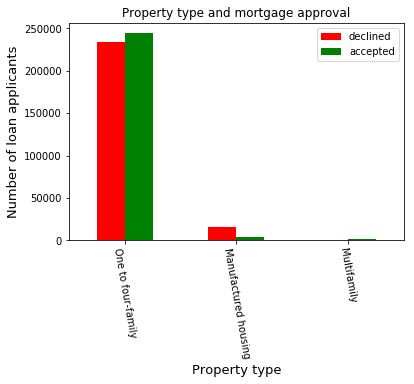

In [30]:
# visualization of loan accepted and property type
pd.crosstab(df.property_type, df.accepted).plot(kind = 'bar', color = ['red', 'green'], title = 'Property type and mortgage approval')
plt.ylabel('Number of loan applicants', fontsize = 13)
plt.xlabel('Property type', fontsize = 13)
plt.xticks([0, 1, 2], ['One to four-family', 'Manufactured housing', 'Multifamily'], rotation = -80)
plt.legend(['declined', 'accepted']);

Property type indicates whether the loan or application was for a one-to-four-family dwelling (other than manufactured housing), manufactured housing, or multifamily dwelling. The most common property type is one-to-four-family dwelling.

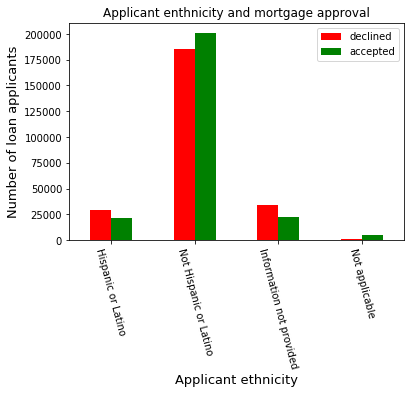

In [31]:
# visualization of loan accepted and applicant ethnicity
pd.crosstab(df.applicant_ethnicity, df.accepted).plot(kind = 'bar', color = ['red', 'green'], title = 'Applicant enthnicity and mortgage approval')
plt.ylabel('Number of loan applicants', fontsize = 13)
plt.xlabel('Applicant ethnicity', fontsize = 13)
plt.xticks([0, 1, 2, 3], ['Hispanic or Latino', 'Not Hispanic or Latino', 'Information not provided', 'Not applicable', 'No co-applicant' ], rotation = -75)
plt.legend(['declined', 'accepted']);

Applicants whose ethnicity are not Hispanic or Latino as the most mortgage loan approval.

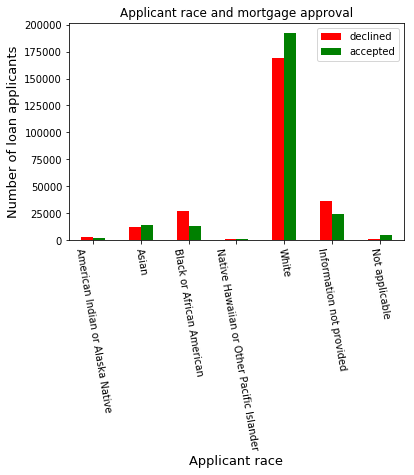

In [32]:
pd.crosstab(df.applicant_race, df.accepted).plot(kind = 'bar', color = ['red', 'green'], 
                                                 title = 'Applicant race and mortgage approval')
plt.ylabel('Number of loan applicants', fontsize = 13)
plt.xlabel('Applicant race', fontsize = 13)
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['American Indian or Alaska Native', 'Asian','Black or African American',
                                   'Native Hawaiian or Other Pacific Islander',
                                   'White', 'Information not provided', 'Not applicable', 'No co-applicant'],
                                    rotation = -80)
plt.legend(['declined', 'accepted']);


Applicant's race has significant impact on the mortgage loan approval. Applicant whose race is white as the chance of loan approval compare to other race.

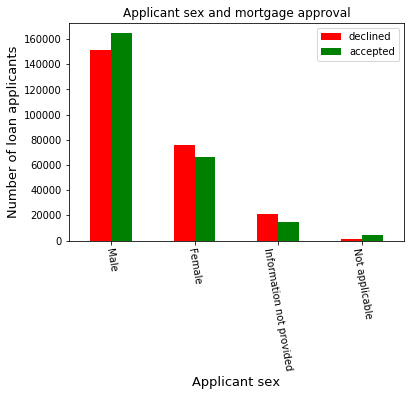

In [33]:
pd.crosstab(df.applicant_sex, df.accepted).plot(kind = 'bar', color = ['red', 'green'], title = 'Applicant sex and mortgage approval')
plt.ylabel('Number of loan applicants', fontsize = 13)
plt.xlabel('Applicant sex', fontsize = 13)
plt.xticks([0, 1, 2, 3], ['Male', 'Female', 'Information not provided', 'Not applicable'], rotation = -80)
plt.legend(['declined', 'accepted']);

Male applicants are most common on the mortgage loan applications.

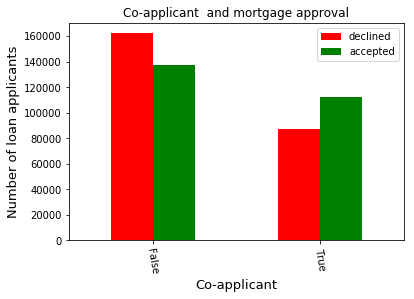

In [34]:
pd.crosstab(df.co_applicant, df.accepted).plot(kind = 'bar', color = ['red', 'green'], title = 'Co-applicant  and mortgage approval')
plt.ylabel('Number of loan applicants', fontsize = 13)
plt.xlabel('Co-applicant', fontsize = 13)
plt.xticks(rotation = -80)
plt.legend(['declined', 'accepted']);

Co-applicant indicates whether there is a co-applicant (often a spouse) or not. The most common applicants are those that chose False.

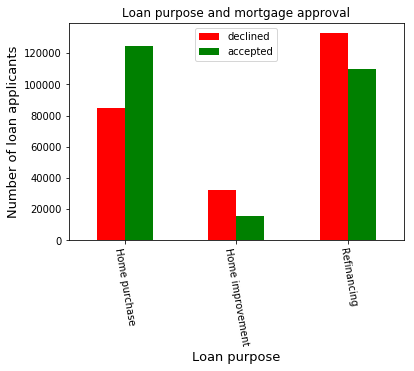

In [35]:
pd.crosstab(df.loan_purpose, df.accepted).plot(kind = 'bar', color = ['red', 'green'], title = 'Loan purpose and mortgage approval')
plt.ylabel('Number of loan applicants', fontsize = 13)
plt.xlabel('Loan purpose', fontsize = 13)
plt.xticks([0, 1, 2], ['Home purchase', 'Home improvement', 'Refinancing'], rotation = -80)
plt.legend(['declined', 'accepted']);

We can see from the chart that the purpose of the loan determines mortgage loan approval. This should be one of the determining factor that impact loan being accepted or decline.



<h2 style="color:purple">Exploratory data analysis on the continuous features</h2>

In [36]:
df.select_dtypes(include = ['float64']).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amount,500000.0,221.753158,590.641648,1.000,93.00000,162.000,266.00,100878.0
applicant_income,460052.0,102.389521,153.534496,1.000,47.00000,74.000,117.00,10139.0
population,477535.0,5416.833956,2728.144999,14.000,3744.00000,4975.000,6467.00,37097.0
minority_population_pct,477534.0,31.617310,26.333938,0.534,10.70000,22.901,46.02,100.0
ffiecmedian_family_income,477560.0,69235.603298,14810.058791,17858.000,59731.00000,67526.000,75351.00,125248.0
tract_to_msa_md_income_pct,477486.0,91.832624,14.210924,3.981,88.06725,100.000,100.00,100.0
number_of_owner-occupied_units,477435.0,1427.718282,737.559511,4.000,944.00000,1327.000,1780.00,8771.0
number_of_1_to_4_family_units,477470.0,1886.147065,914.123744,1.000,1301.00000,1753.000,2309.00,13623.0


The table is the descriptive statistics for the continuous features in the mortgage loan applications data. From the table we have the five number summary and quartile values.

In [37]:
df.select_dtypes(include = ['float64', 'int64']).groupby('accepted').agg(['count', 'mean']).transpose()

accepted                                          0              1
loan_amount                    count  249886.000000  250114.000000
                               mean      194.352733     249.128605
applicant_income               count  231113.000000  228939.000000
                               mean       90.971278     113.916192
population                     count  228332.000000  249203.000000
                               mean     5362.218432    5466.875375
minority_population_pct        count  228332.000000  249202.000000
                               mean       34.173704      29.275008
ffiecmedian_family_income      count  228342.000000  249218.000000
                               mean    68200.209909   70184.265904
tract_to_msa_md_income_pct     count  228304.000000  249182.000000
                               mean       90.470226      93.080872
number_of_owner-occupied_units count  228271.000000  249164.000000
                               mean     1399.955360    1453.153216
number_of_1_to_4_family_units  count  228295.000000  249175.000000
                               mean     1880.390775    1891.420997

**Inpterpretation**

* It can be seen that the average mortgage loan amount requested is higher for loan applications that are accepted when compare to the ones that are declined.


* Applicant who has much income is likely to be given a mortgage loan when compare to the one that has less.



# Machine learning: CatBoost Model

`CatBoost` is a machine learning algorithm that handle categorical (CAT) data automatically. The model derives its name from the word **Category** and **Boosting**. It is a model that works well with multiple categories of learning problem such as classification and regression.

## Advantages of CatBoost model

* **Performance**: CatBoost provides state of the art results and it is competitive with any leading machine learning algorithm on the performance front. 

Before I finally decided to use CatBoost model, I tried different machine learning models that are linear or non linear. The models I trained with HMDA data that have 500,000 rows and 21 features are Neura network with 65% accuracy, Adaboost with $63\%$ accuracy, LDA with $64\%$ accuracy, logistic regression with $64\%$ accuracy, KNN with $62\%$ accuracy, and finally CatBoost model with $72.8\%$ accuracy.

* **Handling Categorical features automatically**: We can use CatBoost without any explicit pre-processing (one hot encoding) to convert categories into numeric. CatBoost converts categorical values into numbers using various statistics on combinations of categorical features and combinations of categorical and numerical features.

HMDA data is a categorical based data. We have 13 different categorical features and if we create a one hot encoding for all this features, there will be a curse of dimensionality for some models such as KNN and the models we are training will not generalize well.

* **Robust**: It reduces the need for extensive hyper-parameter tuning and lower the chances of overfitting also which leads to more generalized models.

CatBoost model with default hyper - parameters generalize well

* **Time and speed**: Running time of Catboost model is not expensive.

Running Catboost on HMDA took 2h 22mins (on 5000 iterations) while KNN took 5 days.

# Data preprocessing



The missing values in the three *property location* features has been coded as $-1$. Therefore, we need to tell Pandas that those values ($-1$) represented missing values.

In [38]:
import numpy as np

column = {'msa_md': -1,
        'state_code': -1,
        'county_code': -1}

df.replace(column, np.nan, inplace = True)

In [39]:
# Checking variables that have missing values
df.isna().sum()

loan_type                             0
property_type                         0
loan_purpose                          0
occupancy                             0
loan_amount                           0
preapproval                           0
msa_md                            76982
state_code                        19132
county_code                       20466
applicant_ethnicity                   0
applicant_race                        0
applicant_sex                         0
applicant_income                  39948
population                        22465
minority_population_pct           22466
ffiecmedian_family_income         22440
tract_to_msa_md_income_pct        22514
number_of_owner-occupied_units    22565
number_of_1_to_4_family_units     22530
lender                                0
co_applicant                          0
accepted                              0
dtype: int64

In [40]:
# Percentage of missing values in each column
df.isna().mean()*100

loan_type                          0.0000
property_type                      0.0000
loan_purpose                       0.0000
occupancy                          0.0000
loan_amount                        0.0000
preapproval                        0.0000
msa_md                            15.3964
state_code                         3.8264
county_code                        4.0932
applicant_ethnicity                0.0000
applicant_race                     0.0000
applicant_sex                      0.0000
applicant_income                   7.9896
population                         4.4930
minority_population_pct            4.4932
ffiecmedian_family_income          4.4880
tract_to_msa_md_income_pct         4.5028
number_of_owner-occupied_units     4.5130
number_of_1_to_4_family_units      4.5060
lender                             0.0000
co_applicant                       0.0000
accepted                           0.0000
dtype: float64


<h2 style="color:purple"> Data imputation of missing values</h2>

* msa_md has 76982(15.4%) missing values
* state_code has 19132(3.8%) missing values
* county_code has 20466(4.1%) missing values
* applicant_income  has 39948(8%) missing values
* population has 22465(4.5%) missing values
* minority_population_pct has 22466(4.5%) missing values
* ffiecmedian_family_income has 22440(4.5%) missing values
* tract_to_msa_md_income_pct has 22514(4.5%) missing values
* number_of_owner-occupied_units has 22565(4.5%) missing values
* number_of_1_to_4_family_units has 22530(4.5%) missing values

We will therefore fill them with some number way out of their distributions - so catboost model would be able to easily distinguish between them and take it into account:

In [41]:
df.fillna(-999, inplace = True)

In [42]:
df.isna().sum()

loan_type                         0
property_type                     0
loan_purpose                      0
occupancy                         0
loan_amount                       0
preapproval                       0
msa_md                            0
state_code                        0
county_code                       0
applicant_ethnicity               0
applicant_race                    0
applicant_sex                     0
applicant_income                  0
population                        0
minority_population_pct           0
ffiecmedian_family_income         0
tract_to_msa_md_income_pct        0
number_of_owner-occupied_units    0
number_of_1_to_4_family_units     0
lender                            0
co_applicant                      0
accepted                          0
dtype: int64


Now let's separate features and label variable:

In [43]:
# Features and label for machine learning model
X = df.drop('accepted', axis = 'columns')
y = df.accepted

We know that our features are of different types - some of are numeric and some are categorical. We will only identify categorical variables and there will not be any preprocessing steps for categorical variables

In [44]:
df = df.astype(convert_dict)
df.dtypes

loan_type                          object
property_type                      object
loan_purpose                       object
occupancy                          object
loan_amount                       float64
preapproval                        object
msa_md                             object
state_code                         object
county_code                        object
applicant_ethnicity                object
applicant_race                     object
applicant_sex                      object
applicant_income                  float64
population                        float64
minority_population_pct           float64
ffiecmedian_family_income         float64
tract_to_msa_md_income_pct        float64
number_of_owner-occupied_units    float64
number_of_1_to_4_family_units     float64
lender                             object
co_applicant                         bool
accepted                            int64
dtype: object

In [45]:
categorical_features_indices = np.where(X.dtypes != np.float)[0]



<h2 style="color:purple">One hot encoding of our categorical features</h2>

Since our data has a lot of categorical features one-hot encoding will not work well.

As it is stated at [catboost](https://catboost.ai/docs/concepts/parameter-tuning.html): Usually one-hot encoding does not significantly improve the quality of the model. Therefore, we will not use one hot encoding.

In [46]:
# importing machine learning packages for Catboost model
from catboost import  CatBoostClassifier, Pool, cv
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data into train and test set


Let's split the data into training and test set. We shall use $85\%$ for training the model and the rest $15\%$ for evaluating the performance of the model. 

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)

# Model Training

We will train the Catboost model with HMDA data using the train set and we shall specify the `accuracy` metric as this would give us an ability to see what's going on in the model, as well as to be able to watch for logloss, as it would be more smooth on dataset of such size.

In [48]:
cat_model = CatBoostClassifier(iterations =4000, depth = 8, learning_rate = 0.01,  eval_metric = 'Accuracy', use_best_model = True, random_seed=40, verbose=False)

In [49]:
%time cat_model.fit(X_train, y_train, cat_features = categorical_features_indices, eval_set = (X_test, y_test), plot = True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Wall time: 1h 10min 18s


In [50]:
print('The train accuracy is: {:.4f}'.format(accuracy_score(y_train, cat_model.predict(X_train))))

The train accuracy is: 0.7486


In [51]:
y_pred = cat_model.predict(X_test)
print('The test accuracy is: {:.4f}'.format(accuracy_score(y_test, y_pred)))

The test accuracy is: 0.7301


We can see that the catboost model is giving a fair solution and training & testing error are in sync. That is, the model is not over fitting. 

## Evaluation of model performance on a test set

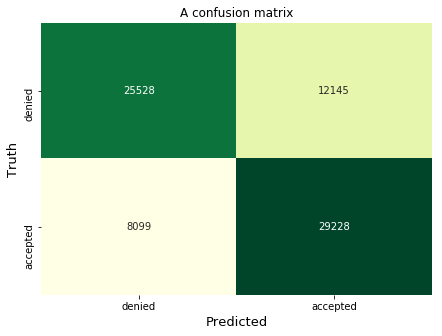

In [52]:
from sklearn.metrics import confusion_matrix, recall_score
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot = True, cbar = False, fmt = 'd', cmap = 'YlGn')
plt.xlabel('Predicted', fontsize = 13)
plt.xticks([0.5, 1.5], ['denied', 'accepted'])
plt.yticks([0.5, 1.5], ['denied', 'accepted'])
plt.ylabel('Truth', fontsize = 13)
plt.title('A confusion matrix');

In [53]:
print('Sensitivity:', round(recall_score(y_test, y_pred), 2))

Sensitivity: 0.78


In [54]:
print('Specificity:', round(25269/(25269 + 12143), 2))

Specificity: 0.68


### Metrics computed from a confusion matrix

The confusion matrix can be interpreted as follows:

There are $29,228$ true positives, $25,528$ true negatives, $8,099$ false negatives and $12,145$ false positives. It can be seen that our model is highly sensitive but not highly specific.

### Feature importances

In [55]:
pd.DataFrame(cat_model.get_feature_importance(prettified = True), columns = ['Features', 'Importances'])

,Features,Importances
0,lender,24.261477
1,applicant_income,11.412920
2,loan_purpose,8.263637
3,loan_amount,7.631065
4,county_code,5.925921
5,minority_population_pct,5.580246
6,ffiecmedian_family_income,5.143461
7,preapproval,4.323583
8,state_code,3.540707
9,number_of_1_to_4_family_units,3.351508


In order of importance lender, applicant income, loan purpose, loan amount, and county code are the top 5 contributors of mortgage loan approval out of the 21 features in the model.


# Validation set 

And finally let's prepare the validation set to predict the outcome for the unknown classes.

In [56]:
# Loading and preprocessing validation set

validation = pd.read_csv('Data/test_values.csv')

# We drop the row id since it is not useful in the model training

validation.drop('row_id', axis = 'columns', inplace = True)

## Data preprocessing

The missing values in the three property location features has been coded as −1. Therefore, we need to tell Pandas that they are coded are missing values

In [57]:
column = {'msa_md': -1,
        'state_code': -1,
        'county_code': -1}

validation.replace(column, np.nan, inplace = True)

### Data imputation of missing values

In [58]:
# Checking variables that have missing values
validation.isna().sum()

loan_type                             0
property_type                         0
loan_purpose                          0
occupancy                             0
loan_amount                           0
preapproval                           0
msa_md                            76993
state_code                        19120
county_code                       20566
applicant_ethnicity                   0
applicant_race                        0
applicant_sex                         0
applicant_income                  40141
population                        22480
minority_population_pct           22482
ffiecmedian_family_income         22453
tract_to_msa_md_income_pct        22517
number_of_owner-occupied_units    22574
number_of_1_to_4_family_units     22550
lender                                0
co_applicant                          0
dtype: int64

We will therefore fill the missing values as we did when building the model with some number way out of their distributions - so the model would be able to easily distinguish between them and take it into account:


In [59]:
validation.fillna(-999, inplace = True)
validation.isna().sum()

loan_type                         0
property_type                     0
loan_purpose                      0
occupancy                         0
loan_amount                       0
preapproval                       0
msa_md                            0
state_code                        0
county_code                       0
applicant_ethnicity               0
applicant_race                    0
applicant_sex                     0
applicant_income                  0
population                        0
minority_population_pct           0
ffiecmedian_family_income         0
tract_to_msa_md_income_pct        0
number_of_owner-occupied_units    0
number_of_1_to_4_family_units     0
lender                            0
co_applicant                      0
dtype: int64

In [60]:
convert_dict = {'loan_type': 'object', 'property_type': 'object', 'loan_purpose': 'object', 'occupancy': 'object',
        'preapproval': 'object', 'msa_md': 'object', 'state_code': 'object', 'county_code': 'object',
       'applicant_ethnicity': 'object', 'applicant_race': 'object', 'applicant_sex': 'object',
       'lender': 'object', 'co_applicant': 'bool'}

validation = validation.astype(convert_dict)
validation.dtypes

loan_type                          object
property_type                      object
loan_purpose                       object
occupancy                          object
loan_amount                       float64
preapproval                        object
msa_md                             object
state_code                         object
county_code                        object
applicant_ethnicity                object
applicant_race                     object
applicant_sex                      object
applicant_income                  float64
population                        float64
minority_population_pct           float64
ffiecmedian_family_income         float64
tract_to_msa_md_income_pct        float64
number_of_owner-occupied_units    float64
number_of_1_to_4_family_units     float64
lender                             object
co_applicant                         bool
dtype: object

In [61]:
# predicting with validation set label
y_pred_cat_model = cat_model.predict(validation)

# Submission to DrivenData website

In [62]:
# Submission file 
submission = pd.read_csv('Data/submission_format.csv')

submission = submission.iloc[:, 0]

file = {'row_id': submission, 'accepted': y_pred_cat_model.astype('int64')}

submission_format = pd.DataFrame(file, columns = ['row_id', 'accepted'])

In [63]:
# Submit file to be sent to submission folder
submission_format.to_csv('Submission/submission.cat_model.csv', index = False)

It is worth knowing that this catboost model prediction on the validation set (test set) achieved a public score of [$0.7330$](https://datasciencecapstone.org/competitions/14/mortgage-approvals-from-government-data/leaderboard/) out of the benchmark of $0.7350$ and you can also read the executive report [here](https://drive.google.com/open?id=1f164QhxelHqndARIls-AYy5bxBDwT7x0).


# Conclusion

This analysis has shown that approval of mortgage applications can be predicted from its characteristics. From the model, we noticed that lender, applicant income, loan purpose, loan amount and county code have a significant effect on the approval of mortgage applications.

---
The Github repository can be found [here](https://github.com/gbganalyst/MPP-in-Data-science) and if you like this write up, you can also follow me on [Twitter](https://www.twitter.com/gbganalyst) and/or [Linkedin](https://www.linkedin.com/in/ezekiel-ogundepo/) for more updates in `R` and `Python` for datascience.


